# Cryptocurrency Research

## 1) Попробуем создать модель, предсказывающую капитализацию BTC

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
bitcoin=pd.read_csv("coin_Bitcoin.csv")
bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [126]:
bitcoin.drop(["Name"],axis=1, inplace=True)
bitcoin.drop(["SNo"],axis=1, inplace=True)
bitcoin.drop(["Symbol"],axis=1, inplace=True)

In [127]:
import datetime as dt
bitcoin["Date"]=pd.to_datetime(bitcoin["Date"])
bitcoin['Date_year'] = bitcoin["Date"].dt.year
bitcoin['Date_month'] = bitcoin["Date"].dt.month
bitcoin['Date_day'] = bitcoin["Date"].dt.day
bitcoin['Date_hour'] = bitcoin["Date"].dt.hour
bitcoin['Date_minute'] = bitcoin["Date"].dt.minute
bitcoin['Date_second'] = bitcoin["Date"].dt.second
bitcoin.drop(["Date"],axis=1, inplace=True)
bitcoin.head()

,High,Low,Open,Close,Volume,Marketcap,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_second
0,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013,4,29,23,59,59
1,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013,4,30,23,59,59
2,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013,5,1,23,59,59
3,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013,5,2,23,59,59
4,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013,5,3,23,59,59


In [128]:
X=bitcoin.drop(["Marketcap"], axis=1)
Y=bitcoin["Marketcap"]


В контексте задачи прогнозирования капитализации биткоина уместно будет использовать модель линейной регрессии (логистическая регрессия не является подходящим выбором,так как она используется для задач классификации, которые требуют предсказать вероятность принадлежности к определенным категориям или классам.

В данном случае использование accuracy_score не подходит для оценки качества модели, так как это метрика для задач классификации, а не для задачи регрессии. Вместо него воспользуемся коэффициентом детерминации (R^2), который показывает, насколько успешно модель "подходит" к нашим данным:  

Формула для R^2:

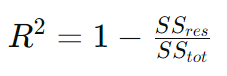

где $SSres$ - сумма квадратов остатков (расстояние между фактическими значениями и предсказанными значениями), а $SStot$- общая сумма квадратов (расстояние между фактическими значениями и средним значением целевой переменной).

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = r2_score(y_test, y_pred)
print("Точность модели (коэффициент детерминации):", accuracy)


Точность модели (коэффициент детерминации): 0.9992120030868554


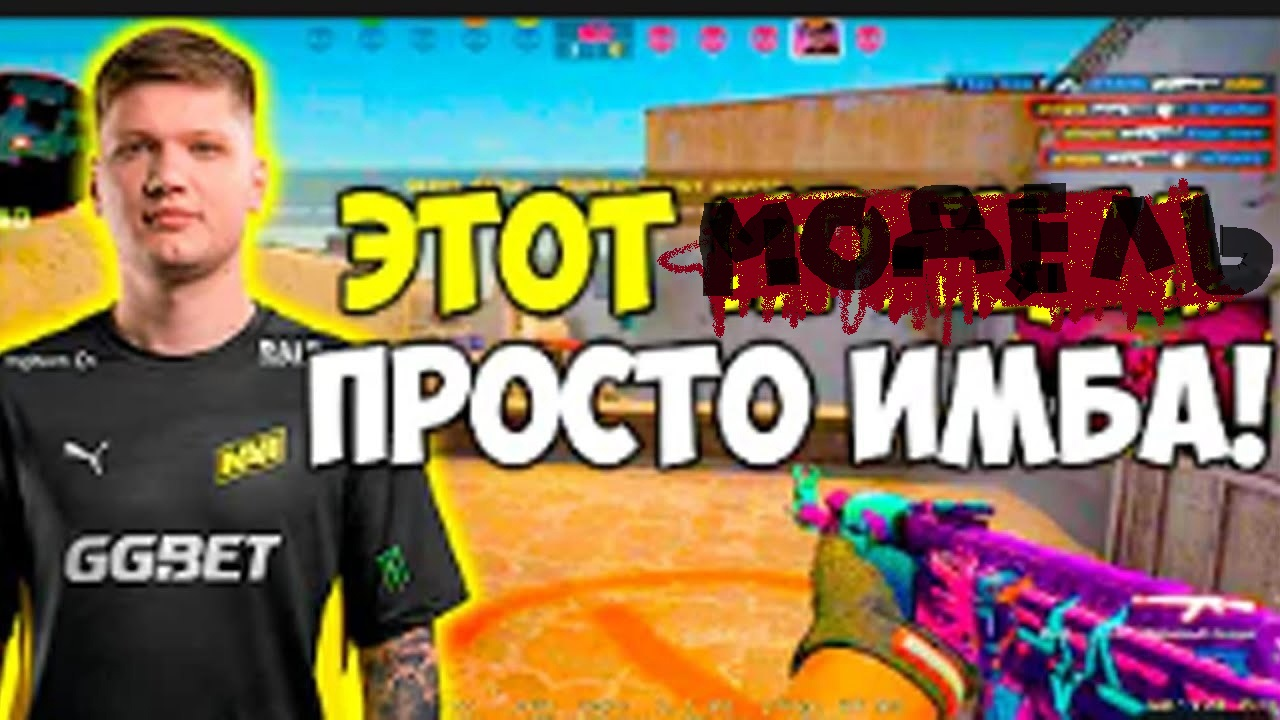

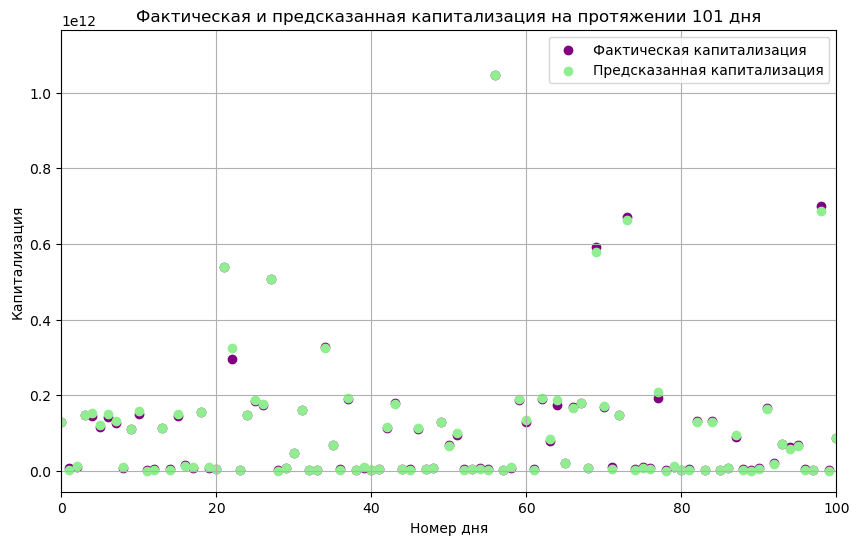

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='purple', label='Фактическая капитализация')
plt.scatter(range(len(y_pred)), y_pred, color='lightgreen', label='Предсказанная капитализация')

plt.ylabel('Капитализация')
plt.xlabel('Номер дня')
plt.title('Фактическая и предсказанная капитализация на протяжении 101 дня')
plt.legend()
plt.grid(True)
plt.xlim(0, 100)

plt.show()

Коэффициент детерминации близок к 1, что свидетельствует о том, что  модель линейной регрессии хорошо соотносится с данными и хорошо объясняет изменчивость целевой переменной.

## 2) Изучим корреляцию стоимости разных криптовалют

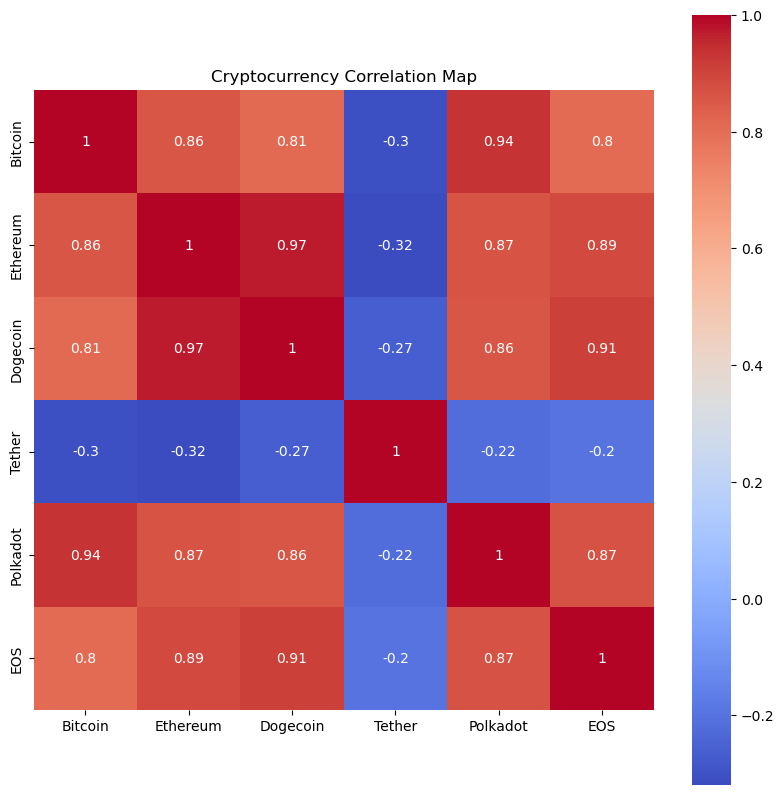

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

files_to_use = ["coin_Bitcoin.csv", "coin_Ethereum.csv", "coin_Dogecoin.csv", "coin_Tether.csv","coin_Polkadot.csv", "coin_EOS.csv"]

df = pd.DataFrame()

for filename in files_to_use:
    currency_name = filename.split("_")[1].split(".")[0]  # Извлекаем название криптовалюты из имени файла
    temp_df = pd.read_csv(filename, usecols=["Date", "Close"], parse_dates=["Date"])
    temp_df.columns = ["Date", currency_name]

    if df.empty:
        df = temp_df
    else:
        df = df.merge(temp_df, on="Date",) # Объединяем датафреймы по столбцу "Date"    

corrmat = df.corr(method='spearman') # Используем тест ранговой корреляции Спирмена

corrmat = corrmat.drop(columns=["Date"]).drop(index=["Date"])

# Создаем тепловую карту
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1., square=True, annot=True, cmap="coolwarm")
plt.title("Cryptocurrency Correlation Map")
plt.show()

Из этой матрицы наглядно видно, что цены альткоинов зачастую сильно коррелируют с ценой btc, то есть если btc испытывает сильное движение вверх или вниз, то это влияет на общее настроение рынка криптовалют и приводит к аналогичному движению цен на альткоинах.